First, a question about gaussian filters. Will a simple filter really produce circularly-symmetric smoothing?

In [1]:
import numpy as np
import scipy.signal
np.set_printoptions(threshold=100)
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
smoother = np.zeros((3, 3))
smoother[1, 1] = 0.4
smoother[0, 1] = 0.15
smoother[2, 1] = 0.15
smoother[1, 0] = 0.15
smoother[1, 2] = 0.15

arr = np.zeros((101, 101))
arr[50, 50] = 1
for _ in range(500):
    arr = scipy.signal.convolve2d(arr, smoother, mode='same')
arr *= (255 / arr.max())
arr = arr.astype('uint8')

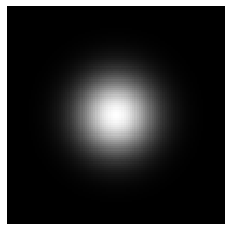

In [3]:
img = Image.fromarray(arr)
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.set_axis_off()

It looks like it, but it's not really a proof. More on this later.

In [26]:
img = Image.open('harbor.jpeg').convert('L')

I'm looking at using smooting before thresholding to simplify an image, removing the stipling. 

In [27]:
def borders(a):
    """
    measure the borders of an array
    treating it as 0's and non 0's.
    """
    return ((a[1:] != a[:-1]).mean() + (a[:, 1:] != a[:, :-1]).mean())/2

In [28]:
def bwify(a, threshold):
    a = a.copy()
    a[a < threshold] = 0
    a[a >= threshold] = 255
    return a

In [29]:
threshold = 123
arr = np.array(img)[::-1, ::-1]
arr1 = arr
for _ in range(100):
    arr1 = scipy.signal.convolve2d(arr1, smoother, mode='same')
    print(borders(bwify(arr1, threshold)))

arr = bwify(arr, threshold)
arr1 = bwify(arr1, threshold)

0.01217002158278635
0.009442079010648778
0.007855637820158695
0.006792608506188992
0.006056957858415075
0.0055108999942029
0.0050936036837287545
0.004748297164999874
0.004467556163970799
0.0042394850753635855
0.0040626068137894385
0.0039054183677507113
0.003763489268063867
0.003637229478516679
0.0035236039387068546
0.003421628153447806
0.0033322866450634604
0.0032540205362237814
0.003182563803238246
0.0031179163104201567
0.0030636879209440166
0.0030092954184072714
0.0029599072787254
0.0029152776376025645
0.002875324228194081
0.002838652320152192
0.002804441660253278
0.0027719538211366324
0.0027398763528678535
0.0027088652938449336
0.002676869773557099
0.0026465970808358693
0.002620426386940911
0.0025945838784611533
0.002569479709145747
0.0025454420644098917
0.0025217326525795816
0.002500648452697483
0.0024798103884846184
0.002461433429943695
0.002441908012410945
0.0024235310403013517
0.0024048259913259156
0.00238669517523856
0.00236922079104062
0.002352402567358701
0.002335502341421158

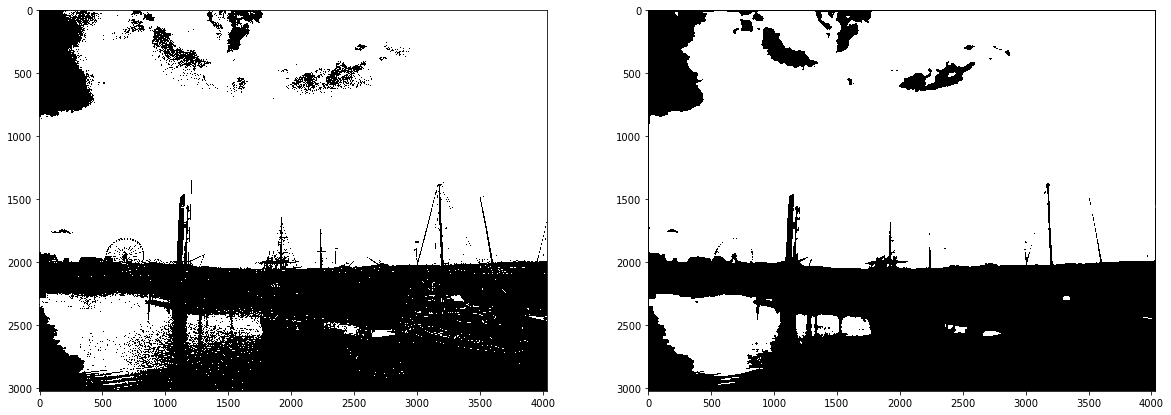

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
ax[0].imshow(Image.fromarray(arr), cmap='gray')
ax[1].imshow(Image.fromarray(arr1), cmap='gray')

In [7]:
arr

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [17]:
borders(arr)

0.01810796432739474

In [31]:
img = Image.open('IMG_4015.mov').convert('L')

UnidentifiedImageError: cannot identify image file 'IMG_4015.mov'